In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Exploration des données

## 1.1. Caractéristiques

La base de données est constitué des arbres relevant de la ville de Paris. </br>
Cela inclut les arbres d’alignement (dans les rues), ceux des espaces verts et des équipements publics municipaux. </br>
Elle n’inclut pas les bosquets, les ensembles forestiers, les arbres du domaine privé etc. </br>

In [2]:
data = pd.read_csv("data\p2-arbres-fr.csv", sep=";")
arbres = data.copy()

In [3]:
arbres.shape

(200137, 18)

In [4]:
arbres.columns  

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

La base de données est constituée  de :
 - 200 137 arbres
 - pour 18 colonnes (dont un identifiant).

Procédons à une analyse, colonne par colonne :

### 1.1.1. Identifiant

In [5]:
sum(arbres['id'].unique() == (arbres['id'])) == arbres.shape[0]

True

On ne détecte aucun doublon dans les identifiants. La colonne sera inutile pour le reste de l'analyse.

### 1.1.2. Type d'emplacement

In [6]:
arbres['type_emplacement'].unique()

array(['Arbre'], dtype=object)

La colonne est inutile car remplie de la même information.

### 1.1.3. Domanialite 
Donnée qualitative. </br>
Renseigne sur le type d'endroit : </br>
 - "DASCO" : "Ecoles"
 - "DJS" : "Equipements sportifs"
 - "DFPE" : "Crèches"
 - "DAC" : "Equipements culturels"
 - "DASES" : "Action sociale"
 - Alignement : rues


In [7]:
domaine = arbres['domanialite']
domaine.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

In [8]:
domaine.value_counts()

Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
Name: domanialite, dtype: int64

### 1.1.4. Arrondissement
Variable qualitative. </br>
Il s'agit de l'arrondissement de Paris, ou du département/bois (hors de la ville de Paris).

In [9]:
arrondissement = arbres['arrondissement']
arrondissement.unique()

array(['PARIS 7E ARRDT', 'PARIS 17E ARRDT', 'PARIS 16E ARRDT',
       'PARIS 4E ARRDT', 'PARIS 13E ARRDT', 'PARIS 12E ARRDT',
       'PARIS 19E ARRDT', 'PARIS 14E ARRDT', 'PARIS 15E ARRDT',
       'PARIS 3E ARRDT', 'PARIS 20E ARRDT', 'PARIS 18E ARRDT',
       'PARIS 6E ARRDT', 'PARIS 11E ARRDT', 'PARIS 1ER ARRDT',
       'PARIS 2E ARRDT', 'PARIS 5E ARRDT', 'VAL-DE-MARNE',
       'SEINE-SAINT-DENIS', 'HAUTS-DE-SEINE', 'PARIS 9E ARRDT',
       'PARIS 10E ARRDT', 'PARIS 8E ARRDT', 'BOIS DE BOULOGNE',
       'BOIS DE VINCENNES'], dtype=object)

In [10]:
arrondissement.value_counts()

PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      10011
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7580
PARIS 8E ARRDT        7245
PARIS 11E ARRDT       5658
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3978
PARIS 10E ARRDT       3385
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2368
PARIS 6E ARRDT        1764
PARIS 1ER ARRDT       1413
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E ARRDT         548
Name: arrondissement, dtype: int64

### 1.1.5. Complément d'adresse
La donnée n'est pas pertinente.

In [11]:
adresse = arbres['complement_addresse']
adresse.unique()

array([nan, 'c 12', '12-36', ..., 'au n.14', 'F2bis', '40face'],
      dtype=object)

In [12]:
adresse.value_counts()

SN°                    557
1                      552
2                      547
3                      498
4                      464
                      ... 
F32 guynemer             1
candélabre XVI 9151      1
numéro 3                 1
19-11                    1
22 (face)                1
Name: complement_addresse, Length: 3795, dtype: int64

### 1.1.6. Numéro
Donnée vide, rempli de NaN.

In [13]:
numero = arbres['numero']
numero.isna().sum()

200137

### 1.1.7. Lieu
Variable qualitative. </br>
Renseigne sur l'endroit où se trouve l'arbre. </br>

In [14]:
lieu = arbres['lieu']
len(lieu.unique())

6921

In [15]:
lieu.value_counts()

PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE                       2995
PARC DES BUTTES CHAUMONT                                          2331
PARC ANDRE CITROEN                                                2095
PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD DES FRERES VOISIN    1478
INSEP / AVENUE DU TREMBLAY                                        1293
                                                                  ... 
CIMETIERE DE BERCY / CHEMIN DE LA CONSERVATION / DIV 1               1
CIMETIERE DE PANTIN / DIV 67                                         1
CIMETIERE DE PANTIN / DIV 28                                         1
PLACE DU MAQUIS DU VERCORS                                           1
MARE (86B)                                                           1
Name: lieu, Length: 6921, dtype: int64

La variables est très morcellée. Elle ne sera pas très intéressante dans le cadre d'une analyse univariée.

### 1.1.8 Identifiant d'emplacement
Variable qualitative.

In [16]:
emplacement_id = arbres['id_emplacement']
len(emplacement_id.unique())

69040

In [17]:
emplacement_id.value_counts()

101001          1324
101002          1241
101003          1128
202001          1032
101004          1020
                ... 
A05200093001       1
00G403012          1
A13600128004       1
5340005            1
A14800027001       1
Name: id_emplacement, Length: 69040, dtype: int64

On note beaucoup d'emplacements et que l'identifiant n'est pas interprétable sans l'association à un lieu. </br>
La variable ne sera pas comprise dans l'analyse univariée.

## # 1.1.9 Libellé français
Variable qualitative donnant le nom français de l'arbre.

In [18]:
libelle = arbres['libelle_francais']
libelle.unique()

array(['Marronnier', 'If', 'Erable', 'Arbre à miel', 'Platane', 'Sophora',
       'Prunus n. sp.', 'Hêtre', 'Micocoulier', 'Tilleul', 'Chêne',
       'Savonnier', 'Copalme', 'Noyer', 'Arbre à caramel', 'Troene',
       'Tulipier', 'Pin', 'Sapin', 'Cerisier à fleurs', 'Charme-Houblon',
       'Cèdre', 'Paulownia', 'Thuya', 'Pommier à fleurs', 'Poirier',
       'Pommier', 'Bouleau', 'Orme', 'Arbre de Judée', 'Robinier',
       'Frêne', 'Aubépine', 'Fevier', 'Prunier à fleurs',
       'Arbre aux quarante écus', 'Néflier commun', 'Saule', 'Magnolia',
       'Prunier à fruits', 'Poirier à fleurs', 'Peuplier', 'Faux-cyprès',
       'Aubepine', nan, 'Plaqueminier', 'Mûrier', 'Pêcher', 'Pterocarya',
       'Merisier', 'Noisetier de Byzance', 'Alisier', 'Cognassier',
       'Parrotie de Perse - Arbre de fer', 'Poirier à fruits',
       'Orme de Sibérie', 'Frêne à fleurs', 'Aulne', 'Troëne',
       'Fontanesia', 'Cornouiller', 'Cedrele', 'Catalpa', 'Houx', 'Buis',
       'Metaséquoia', 'Chicot d

In [19]:
libelle.value_counts().head(15)

Platane                 42508
Marronnier              25207
Tilleul                 21305
Erable                  18389
Sophora                 11797
Frêne                    5171
Pin                      4844
Micocoulier              4201
Chêne                    3866
Cerisier à fleurs        3767
Charme                   3471
Poirier à fleurs         3409
Noisetier de Byzance     3372
Peuplier                 3314
Robinier                 2305
Name: libelle_francais, dtype: int64

In [20]:
len(libelle.value_counts())

192

On dénombre 192 nom d'arbres. Il y a des catégories dominantes et un grand nombre de catégorié très rares.

### 1.1.10 Genre
Variable qualitative.

In [21]:
genre = arbres['genre']
genre.unique()

array(['Aesculus', 'Taxus', 'Acer', 'Tetradium', 'Platanus', 'Sophora',
       'Prunus', 'Fagus', 'Celtis', 'Tilia', 'Quercus', 'Koelreuteria',
       'Liquidambar', 'Juglans', 'Cercidiphyllum', 'Ligustrum',
       'Liriodendron', 'Pinus', 'Abies', 'Ostrya', 'Cedrus', 'Paulownia',
       'Thuja', 'Malus', 'Pyrus', 'Betula', 'Ulmus', 'Cercis', 'Robinia',
       'Fraxinus', 'Crataegus', 'Gleditsia', 'Ginkgo', 'Mespilus',
       'Salix', 'Magnolia', 'Populus', 'Chamaecyparis', 'Diospyros',
       'Morus', 'Pterocarya', 'Corylus', 'Sorbus', 'Cydonia', 'Parrotia',
       'Zelkova', 'Alnus', 'Cladrastis', 'Fontanesia', 'Cornus', 'Toona',
       'Catalpa', 'Ilex', 'Buxus', 'Metasequoia', 'Gymnocladus',
       'Maclura', 'Cephalotaxus', 'Rhus', 'Castanea', 'Ailanthus',
       'Broussonetia', 'Sequoiadendron', 'Lagerstroemia', 'Pterostyrax',
       'Eucalyptus', 'Olea', 'Ficus', 'Carpinus', 'Sambucus', 'Picea',
       'Amelanchier', 'Laburnum', 'Phillyrea', 'Sequoia', 'Aralia',
       'Phellode

In [22]:
genre.value_counts()

Platanus       42591
Aesculus       25341
Tilia          21550
Acer           18471
Sophora        11830
               ...  
Idesia             1
Cordyline          1
Euscaphis          1
Sciadopitys        1
Caragana           1
Name: genre, Length: 175, dtype: int64

175 genres sont présents, on reconnait des catégories proches du libellé français.

### 1.1.11 Espèce
Variable qualitative.

In [23]:
espece = arbres['espece']
espece.unique()

array(['hippocastanum', 'baccata', 'negundo', 'daniellii', 'x hispanica',
       'japonica', 'n. sp.', 'sylvatica', 'occidentalis', 'tomentosa',
       'robur', 'paniculata', 'rufinerve', 'styraciflua', 'nigra',
       'japonicum', 'lucidum', 'tulipifera', 'concolor', 'saccharinum',
       'x europaea', 'platyphyllos', 'platanoides', 'serrulata',
       'carpinifolia', 'libani', 'wallichiana', 'floribunda', 'pendula',
       'siliquastrum', 'pseudoacacia', 'excelsior', 'laevigata',
       'pseudoplatanus', 'triacanthos', 'cerasifera', 'campestre',
       'biloba', 'buergerianum', 'germanica', 'cerris', 'regia',
       'sylvestris', 'rubra', 'nigra subsp. nigra', 'alba',
       'tataricum subsp. ginnala', 'domestica', 'calleryana',
       'cappadocicum', 'x carnea', 'lawsoniana', 'x turneri', 'utilis',
       'maackii', 'kaki', 'cordata', 'persica', 'fraxinifolia',
       'frainetto', 'avium', 'x soulangeana', 'colurna', 'torminalis',
       'petraea', 'ilex', 'oblonga', 'davidii', 'com

In [24]:
espece.value_counts()

x hispanica                 36409
hippocastanum               20039
japonica                    11822
n. sp.                       9063
tomentosa                    8962
                            ...  
x coriaceum                     1
lusitanica subsp.azorica        1
baccata var. mandshurica        1
minor var. vulgaris             1
mariana                         1
Name: espece, Length: 539, dtype: int64

Une variable très détaillée avec 539 catégories.

### 1.1.12 Variété
Variable qualitative.

In [25]:
variete = arbres['variete']
variete.unique()

array([nan, "Atropunicea'", "Euchlora'", "Schwedleri'", "Pissardii'",
       "Pallida'", 'n. sp.', "Chanticleer'", "Purpureum'", "Italica'",
       "Aspleniifolia'", "Jacquemontii'", "Fastigiata'",
       "Fastigiate Koster'", "Imperialis'", "Honey Dew'",
       "Jacqueline Hillier'", "Rubra Plena'", "Diversifolia'",
       "Flamingo'", "Argentea Marginata'", "Pendula'", "Liempde'",
       "Pyramidalis'", "Tortuosa'", "Aurea'", "Frisia'", "Leopoldii'",
       "Aldenhamensis'", "Briotii'", "Kanzan'", "Variegata'", "Hizakura'",
       "Albomarginata'", "Bradford'", "Autumnalis Rosea'",
       "Atropurpurea'", "Castanaefolia'", "Eddie's White Wonder'",
       "Autumnalis'", "Heaven Scent'", "Schouten'", "Sundew'",
       "Leonard messel'", "Merrill'", "Plena'", "Unifolia'", "Accolade'",
       "Baumannii'", "Virginiana'", "Flying Dragon'", "Laciniata'",
       "Laciniatum'", "Globosum'", "Rohanii'", "Golden Hornet'",
       "Glauca'", "Youngii'", "Contorta'", "Umbraculifera'", "Jaspidea'"

In [26]:
variete.value_counts()

Baumannii'             4538
Briotii'               2827
Euchlora'              2756
Chanticleer'           2595
Fastigiata'            2483
                       ... 
Patte de Loup'            1
Fairview'                 1
Triomphe de Vienne'       1
Conspicua'                1
Lane'                     1
Name: variete, Length: 436, dtype: int64

De nouveau une variable très détaillée avec 436 catégories.

### 1.1.13 Circonférence

In [27]:
circonference = arbres['circonference_cm']
circonference.describe()
       

count    200137.000000
mean         83.380479
std         673.190213
min           0.000000
25%          30.000000
50%          70.000000
75%         115.000000
max      250255.000000
Name: circonference_cm, dtype: float64

On identifie des données erronées avec des unités de mesures inexactes. La variable sera pollué par ces mesures difficiles à identifier et donc à éliminer.

### 1.1.14 Hauteur

In [28]:
hauteur = arbres['hauteur_m']
hauteur.describe()

count    200137.000000
mean         13.110509
std        1971.217387
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max      881818.000000
Name: hauteur_m, dtype: float64

In [29]:
hauteur[hauteur>80]

5392      1510
6473       117
12536      255
12755       96
15373      810
          ... 
189053     150
189441     157
189518     105
197136     125
197146     105
Name: hauteur_m, Length: 235, dtype: int64

Même constat que pour la circonférence sur des données dans une mauvaise unité de mesure.

### 1.1.15 Stade de développement
Variable qualitative
J pour Jeune, JA pour Jeune Adulte, A pour Adulte et M pour Mature.

In [30]:
stade = arbres['stade_developpement']
stade.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

In [31]:
stade.value_counts()

A     64438
JA    35444
J     26937
M      6113
Name: stade_developpement, dtype: int64

### 1.1.16 Remarquable
Variable qualitative binaire.

In [32]:
remarquable = arbres['remarquable']
remarquable.unique()

array([ 0., nan,  1.])

In [33]:
remarquable.value_counts()

0.0    136855
1.0       184
Name: remarquable, dtype: int64

### 1.1.17 Latitude

In [34]:
latitude = arbres['geo_point_2d_a']
latitude.describe()

count    200137.000000
mean         48.854491
std           0.030234
min          48.742290
25%          48.835021
50%          48.854162
75%          48.876447
max          48.911485
Name: geo_point_2d_a, dtype: float64

### 1.1.18 Longitude

In [35]:
longitude = arbres['geo_point_2d_b']
longitude.describe()

count    200137.000000
mean          2.348208
std           0.051220
min           2.210241
25%           2.307530
50%           2.351095
75%           2.386838
max           2.469759
Name: geo_point_2d_b, dtype: float64

Les données sont consistantes, proches des coordonnées de Paris

# 2. Traitement et nettoyage des données

## 2.1. Suppression de doublon

In [36]:
# coordonnees = []
# indices = []
# for i in range(len(latitude)):
#     if (latitude[i], longitude[i]) in coordonnees:
#         j = coordonnees.index((latitude[i], longitude[i]))
#         indices.append([i, j])
#     coordonnees.append((latitude[i], longitude[i]))
# len(latitude) - len(set(coordonnees)) # Nombre de doublons

In [37]:
indices = [[10100, 10099], [76385, 12794], [76386, 12795], [76387, 12796], [185480, 185479], [188304, 188269], [189134, 189133], [193017, 193007], [193577, 188329], [193586, 188426], [193587, 188427]]
print(indices)

[[10100, 10099], [76385, 12794], [76386, 12795], [76387, 12796], [185480, 185479], [188304, 188269], [189134, 189133], [193017, 193007], [193577, 188329], [193586, 188426], [193587, 188427]]


In [38]:
for indice in indices:
    for j in range(len(arbres.iloc[indice[0], :])):
        print(str(arbres.iloc[indice[0], j]) + ' ' * (30 - len(str(arbres.iloc[indice[0], j]))) + '| ' + str(arbres.iloc[indice[1], j]))
    print("-" * 60)

112287                        | 112286
Arbre                         | Arbre
Jardin                        | Jardin
PARIS 12E ARRDT               | PARIS 12E ARRDT
nan                           | nan
nan                           | nan
JARDIN PARTAGE BEL-AIR        | JARDIN PARTAGE BEL-AIR
6                             | 5
Ailante                       | Ailante
Ailanthus                     | Ailanthus
altissima                     | altissima
nan                           | nan
0                             | 0
0                             | 0
nan                           | nan
nan                           | nan
48.8383178014                 | 48.8383178014
2.4066099032                  | 2.4066099032
------------------------------------------------------------
195525                        | 115338
Arbre                         | Arbre
PERIPHERIQUE                  | Jardin
PARIS 19E ARRDT               | PARIS 19E ARRDT
nan                           | nan
nan                    

### Choix sur les potentiels doublons :

  - 10100, 10099   : Les lignes se suivent et contiennent les mêmes informations : suppression de la ligne 10 099.
  - 76385, 12794   : Lignes concordantes, deux différences  : suppression de la ligne 76 385.
  - 76386, 12795   :                ,,                      : suppression de la ligne 76 386.
  - 76387, 12796   :                ,,                      : suppression de la ligne 76 387.
  - 185480, 185479 : Les lignes se suivent et contiennent les mêmes informations : suppression de la ligne 185 480.
  - 188304, 188269 : Les lignes sont relativement proches   : suppression de la ligne 188 304
  - 189134, 189133 : Les lignes se suivent et concordent : suppression de la ligne la moins détailée : 189 133.
  - 193017, 193007 : Les données diffèrent. Aucune suppression.
  - 193577, 188329 : Les données diffèrent. Aucune suppression.
  - 193586, 188426 : Les lignes concordent. Suppression de la ligne la moins détailée : 193 586.
  - 193587, 188427 :                ,,      Suppression de la ligne la moins détailée : 193 587.

Bilan : 9 suppressions : 10 099, 76 385, 76 386, 76 387, 185 480, 188 304, 189 133, 193 586, 193 587.


In [39]:
doublon_index = [10099, 76385, 76386, 76387, 185480, 188304, 189133, 193586, 193587]

## 2.2. Suppression des variables
Les colonnes peu ou pas pertinentes sont : </br>
['id', 'type_emplacement', 'complement_addresse', 'numero', 'lieu', 'id_emplacement']</br>
</br>
Les colonnes redondantes sont :</br>
['libelle_francais', 'genre', 'espece', 'variete']</br>
On conserve 'libelle_francais'.</br>
</br>
Les colonnes supprimées sont donc :</br>
['id', 'complement_addresse', 'numero', 'lieu', 'id_emplacement', 'genre', 'espece', 'variete']

In [40]:
arbres = arbres.drop(columns=['id', 'type_emplacement', 'complement_addresse', 'numero', 'lieu', 'id_emplacement', 'genre', 'espece', 'variete'])

### 2.2.1. Gestion des NaN

In [41]:
arbres.isna().sum()

domanialite                1
arrondissement             0
libelle_francais        1497
circonference_cm           0
hauteur_m                  0
stade_developpement    67205
remarquable            63098
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

On supprime la ligne dont la 'domanialite' est NaN :

In [42]:
libelle_nan = arbres.index[arbres['libelle_francais'].isna()]
libelle_nan

Int64Index([   528,   1416,   2727,   5282,   5287,   5316,   5350,   5468,
              5495,   5496,
            ...
            200040, 200049, 200077, 200103, 200109, 200120, 200121, 200128,
            200129, 200132],
           dtype='int64', length=1497)

In [43]:
domanialite_nan = arbres.index[arbres['domanialite'].isna()]
domanialite_nan

Int64Index([197239], dtype='int64')

In [44]:
developpement_nan = arbres.index[arbres['stade_developpement'].isna()]
developpement_nan

Int64Index([     0,      4,      5,      6,      7,     11,     12,     13,
                14,     15,
            ...
            200127, 200128, 200129, 200130, 200131, 200132, 200133, 200134,
            200135, 200136],
           dtype='int64', length=67205)

In [45]:
arbres['remarquable'].fillna(0)
arbres['remarquable'] = arbres.remarquable.fillna(0)
arbres['remarquable'].value_counts()

0.0    199953
1.0       184
Name: remarquable, dtype: int64

In [46]:
circonference_null = arbres.index[arbres['circonference_cm'] == 0]
circonference_null

Int64Index([  1778,   2332,   2333,   2405,   2430,   2431,   2432,   2434,
              2435,   2436,
            ...
            200127, 200128, 200129, 200130, 200131, 200132, 200133, 200134,
            200135, 200136],
           dtype='int64', length=25867)

In [47]:
hauteur_null =arbres.index[arbres['hauteur_m'] == 0]
hauteur_null

Int64Index([     4,      5,      6,     11,     12,     13,     14,     15,
                16,     17,
            ...
            200127, 200128, 200129, 200130, 200131, 200132, 200133, 200134,
            200135, 200136],
           dtype='int64', length=39219)

## 2.3. Valeurs aberrantes

Dans les variables catégorielles (arbres remarquables compris), pas de valeurs aberrantes dans le sens où elles sont dans l'une des catégories ou traitées. </br>
</br>
Il reste donc les variables : circonférence, hauteur et les coordonnées géographiques.</br>
</br>
Je me base sur ce [site](https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris) pour déterminer mes valeurs maximales. Je prends une marge sur les valeurs données.</br>
</br>
Cependant, il faut rester conscient que les données avec des unités erronées ne seront pas toutes supprimées</br>
</br>
Je fixe :
 - circonférence maximale 8 m = 8 000 cm
 - hauteur maximale de 35 m




In [48]:
outliers = []
outliers.extend(list(arbres.index[arbres['circonference_cm'] > 8000]))
outliers.extend(list(arbres.index[arbres['hauteur_m'] > 35]))
outliers

[71787,
 90605,
 91256,
 97354,
 103437,
 147235,
 147634,
 149056,
 152303,
 160432,
 164616,
 173343,
 4518,
 4524,
 4534,
 4537,
 4553,
 5392,
 5469,
 5599,
 6473,
 10875,
 12536,
 12696,
 12755,
 13215,
 13224,
 14048,
 15093,
 15167,
 15373,
 21081,
 21097,
 21113,
 22244,
 24099,
 24133,
 24402,
 24403,
 24578,
 24604,
 24605,
 24607,
 28007,
 33983,
 34609,
 44019,
 44050,
 44116,
 45893,
 50414,
 55782,
 56193,
 56200,
 56214,
 56477,
 60613,
 63970,
 67456,
 67692,
 67708,
 68193,
 68681,
 69051,
 69350,
 69846,
 69996,
 70112,
 70553,
 70718,
 70885,
 72268,
 72434,
 72507,
 75444,
 76073,
 80016,
 80719,
 82555,
 82571,
 82574,
 82951,
 84528,
 84554,
 84813,
 85707,
 87091,
 87265,
 87465,
 87634,
 87931,
 88557,
 89007,
 90817,
 91152,
 91711,
 92281,
 92396,
 92524,
 92636,
 95444,
 96002,
 96481,
 96483,
 96572,
 96586,
 96887,
 97326,
 97350,
 98799,
 99572,
 100077,
 101358,
 101824,
 101833,
 101985,
 102132,
 102819,
 104641,
 104838,
 105224,
 105391,
 105392,
 1053

In [49]:
deleted_index = list(doublon_index)
deleted_index.extend(list(libelle_nan))
deleted_index.extend(list(domanialite_nan))
deleted_index.extend(list(developpement_nan))
deleted_index.extend(list(circonference_null))
deleted_index.extend(list(hauteur_null))
deleted_index.extend(outliers)
len(set(deleted_index))

71158

In [50]:
arbres_cleaned = arbres.drop(set(deleted_index), axis=0)
arbres_cleaned

,domanialite,arrondissement,libelle_francais,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
1,Jardin,PARIS 7E ARRDT,If,65,8,A,0.0,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,If,90,10,A,0.0,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,Erable,60,8,A,0.0,48.857722,2.321006
8,Jardin,PARIS 16E ARRDT,Sophora,145,14,A,0.0,48.871990,2.275814
9,Jardin,PARIS 16E ARRDT,Sophora,135,10,A,0.0,48.872046,2.275752
...,...,...,...,...,...,...,...,...,...
198859,DJS,PARIS 19E ARRDT,Peuplier,20,5,J,0.0,48.890466,2.397443
198860,Jardin,PARIS 14E ARRDT,Hêtre,55,7,J,0.0,48.823919,2.337872
198861,Jardin,PARIS 14E ARRDT,If,55,5,JA,0.0,48.821099,2.338411
198862,Jardin,PARIS 14E ARRDT,If,75,5,JA,0.0,48.823552,2.337892


In [51]:
arbres_cleaned.isna().sum()

domanialite            0
arrondissement         0
libelle_francais       0
circonference_cm       0
hauteur_m              0
stade_developpement    0
remarquable            0
geo_point_2d_a         0
geo_point_2d_b         0
dtype: int64

In [52]:
arbres_cleaned = arbres_cleaned.rename(columns={
    'libelle_francais': 'espece',
    'circonference_cm': 'circonference',
    'hauteur_m': 'hauteur',
    'stade_developpement': 'stade',
    'geo_point_2d_a': 'latitude',
    'geo_point_2d_b': 'longitude'})
arbres_cleaned = arbres_cleaned.replace(
    {
        'PARIS 20E ARRDT': 20,
        'PARIS 19E ARRDT': 19,
        'PARIS 18E ARRDT': 18,
        'PARIS 17E ARRDT': 17,
        'PARIS 16E ARRDT': 16,
        'PARIS 15E ARRDT': 15,
        'PARIS 14E ARRDT': 14,
        'PARIS 13E ARRDT': 13,
        'PARIS 12E ARRDT': 12,
        'PARIS 11E ARRDT': 11,
        'PARIS 10E ARRDT': 10,
        'PARIS 9E ARRDT': 9,
        'PARIS 8E ARRDT': 8,
        'PARIS 7E ARRDT': 7,
        'PARIS 6E ARRDT': 6,
        'PARIS 5E ARRDT': 5,
        'PARIS 4E ARRDT': 4,
        'PARIS 3E ARRDT': 3,
        'PARIS 2E ARRDT': 2,
        'PARIS 1ER ARRDT': 1,
        'VAL-DE-MARNE': 94,
        'SEINE-SAINT-DENIS': 93,
        'HAUTS-DE-SEINE': 92,
        "DASCO": "Ecoles",
        "DJS": "Equipements sportifs",
        "DFPE": "Crèches",
        "DAC": "Equipements culturels",
        "DASES": "Action sociale",
    }
)

# 3. Synthèse

In [53]:
arbres_cleaned.columns

Index(['domanialite', 'arrondissement', 'espece', 'circonference', 'hauteur',
       'stade', 'remarquable', 'latitude', 'longitude'],
      dtype='object')

<AxesSubplot:title={'center':'Figure 1 : Distribution des espèces'}, ylabel='None'>

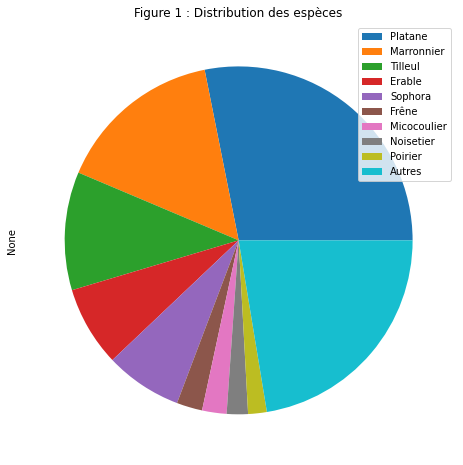

In [54]:
arbres_cleaned['espece'] = arbres_cleaned['espece'].apply(lambda x: x.split()[0])
others = arbres_cleaned.espece.value_counts().sum() - arbres_cleaned.espece.value_counts().head(9).sum()
top_espece=arbres_cleaned.espece.value_counts().head(9).append(pd.Series([others], index=["Autres"]))
top_espece.plot.pie(legend=True, labels=None, figsize=(8,8), title='Figure 1 : Distribution des espèces')

<AxesSubplot:title={'center':'Figure 2 : Distribution des domaines'}, ylabel='domanialite'>

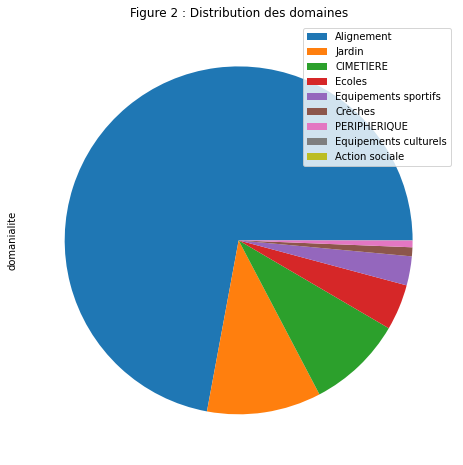

In [55]:
arbres_cleaned.domanialite.value_counts().plot.pie(legend=True, labels=None, figsize=(8,8), title='Figure 2 : Distribution des domaines')

Text(0, 0.5, "Nombre d'arbres")

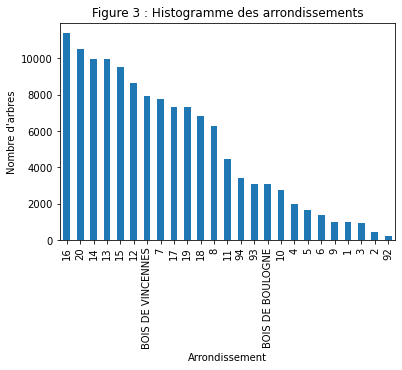

In [56]:
arbres_cleaned.arrondissement.value_counts().plot(kind='bar')
plt.title('Figure 3 : Histogramme des arrondissements')
plt.xlabel('Arrondissement')
plt.ylabel("Nombre d'arbres")

In [57]:
arbres_cleaned.circonference.describe()

count    128979.000000
mean         97.360981
std          74.635960
min           1.000000
25%          55.000000
50%          85.000000
75%         130.000000
max        6595.000000
Name: circonference, dtype: float64

In [58]:
def determine_maxvalue(serie):
    q75, q25 = np.percentile(serie, [75 ,25])
    iqr = (q75 - q25) * 1.5
    max = q75 + iqr
    return max

In [59]:
max_circonference = determine_maxvalue(arbres_cleaned['circonference'])
max_circonference

242.5

D:\Logiciels\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Figure 4 : Diagramme en boîte circonférences')

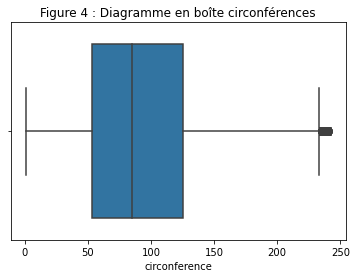

In [60]:
sns.boxplot(arbres_cleaned['circonference'][arbres_cleaned['circonference']<max_circonference]).set_title("Figure 4 : Diagramme en boîte circonférences")

In [61]:
arbres_cleaned['circonference'].describe()

count    128979.000000
mean         97.360981
std          74.635960
min           1.000000
25%          55.000000
50%          85.000000
75%         130.000000
max        6595.000000
Name: circonference, dtype: float64

Text(0, 0.5, "Nombre d'arbres")

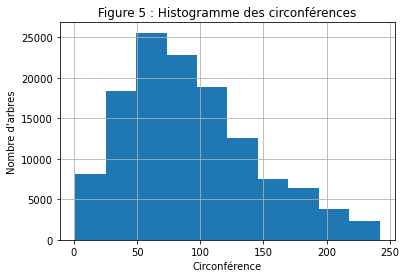

In [62]:
arbres_cleaned['circonference'][arbres_cleaned['circonference']<max_circonference].hist()
plt.title("Figure 5 : Histogramme des circonférences")
plt.xlabel("Circonférence")
plt.ylabel("Nombre d'arbres")

D:\Logiciels\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Figure 6 : Diagramme en boîte hauteurs')

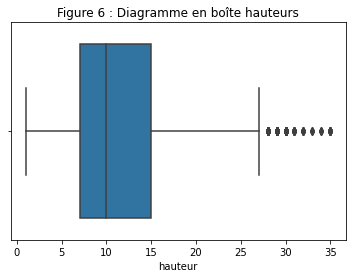

In [63]:
sns.boxplot(arbres_cleaned['hauteur']).set_title("Figure 6 : Diagramme en boîte hauteurs")

Text(0, 0.5, "Nombre d'arbres")

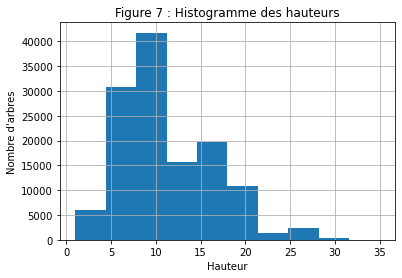

In [64]:
arbres_cleaned['hauteur'].hist()
plt.title("Figure 7 : Histogramme des hauteurs")
plt.xlabel("Hauteur")
plt.ylabel("Nombre d'arbres")

Text(0.5, 1.0, 'Figure 8 : Distribution des stades de dévelopemment')

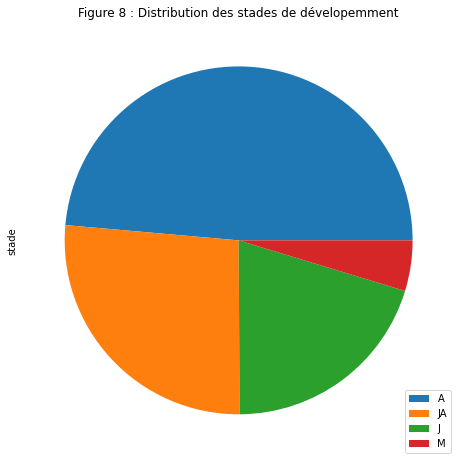

In [65]:
arbres_cleaned['stade'].value_counts().plot.pie(legend=True, labels=None, figsize=(8,8))
plt.title("Figure 8 : Distribution des stades de dévelopemment")

Text(0.5, 1.0, 'Figure 9 : Distribution des espèces dans les arbres remarquables')

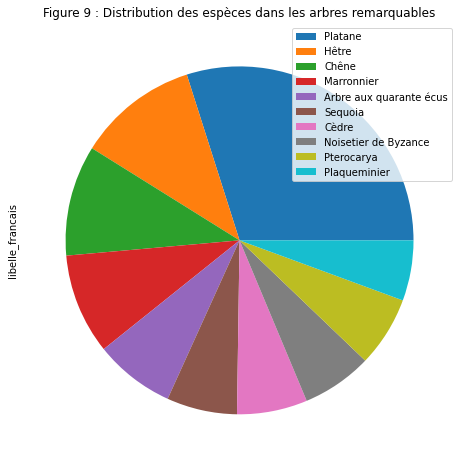

In [66]:
arbres_remarquables = arbres[arbres['remarquable']==1]
arbres_remarquables['libelle_francais'].value_counts().head(10).plot.pie(legend=True, labels=None, figsize=(8,8))
plt.title("Figure 9 : Distribution des espèces dans les arbres remarquables")

Text(0, 0.5, 'Latitude')

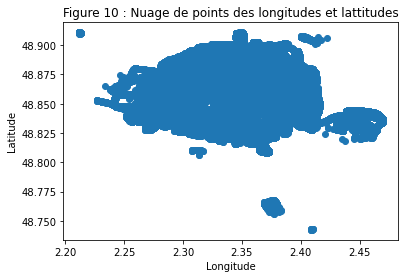

In [67]:
plt.scatter(arbres_cleaned['longitude'], arbres_cleaned['latitude'])
plt.title("Figure 10 : Nuage de points des longitudes et lattitudes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
